# Recesiones en México

Arthur Burns y Wesley Michell en 1946 en su libro "Measuring Bussiness Cycles" definen al ciclo económico como:

"…*las fluctuaciones en la actividad agregada de un país que se encuentra organizada en empresas de negocios*…"

**El ciclo económico clásico se caracteriza por tres fases principales:** 

I.	**Recesión**: es la etapa donde la actividad económica comienza a disminuir y termina cuando la actividad económica alcanza su punto más bajo. 

II.	**Recuperación**: comienza cuando la actividad económica comienza a crecer despues de una recesión y termina cuando la actividad alcanza el nivel del pico donde comenzó la recesión.

III. **Expansión**: Es cuando la actividad económica se está expandiendo y supera el nivel del pico de la recesión.


Un ciclo económico clásico se vería de la siguiente manera

![image-2.png](attachment:image-2.png)

Fuente: Jonathan Heath (2012), Lo que indican los indicadores. Cómo utilizar la información estadística para entender la realidad económica de México. INEGI. versión electrónica: https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825003406

De acuerdo con el Cómite de Fechado de Ciclos de la Economía de México, han ocurrido las siguientes recesiones desde 1980 hasta la actualidad.

| | Recesión  | Fecha inicio    | Fecha Fin   | Duración   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Crisis del 82 | Dic-1981       | Jun-1983   | 19 meses     |
| 2 | Crisis del 86  | Oct-1985    | Dic-1986   | 15 meses     |
| 3 | Crisis del 94  | Dic-1994    | May-1995   | 6 meses     |
| 4 | Crisis del 01  | Oct-2000    | Ene-2002   | 16 meses     |
| 5 | Crisis del 08  | Jul-2008    | May-2009   | 11 meses     |
| 6 | Crisis del Covid | Jun-2019    | May-2020   | 12 meses     |

Por lo tanto en esta notebook se analizara el último ciclo económico de la economía mexicana. Pero antes de nuestro análisis graficaremos y veremos los ciclos de la economía mexicana y la evolución del PIB trimestral desestacionalizado.

**Antes que nada importamos las librerías básicas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importamos las series de timepo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller

#Modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

primero importamos los datos de los archivos que se adjuntan en esta tarea

In [3]:
## los datos mensuales de las recesiones
datos_rec = pd.read_excel('recesionmex.xlsx')

## los datos del PIB de México
pib_trim=pd.read_excel('pib_trim.xlsx')

asegurarse que las fechas sean fechas

In [4]:
## convertimos en fechas los datos de recesión
datos_rec['fecha']=pd.to_datetime(datos_rec['fecha'])
# convertimos en fechas los datos del PIB
pib_trim.fecha=pd.PeriodIndex(pib_trim.fecha, freq='Q')

In [5]:
#creamos un duplicado de los datos de recesión
datos_rec2=datos_rec.copy()

## recesiones es un 1, así que multiplicamos para que las areas gris lleguen cubra los limites del eje Y
datos_rec2['recesion']=datos_rec2['recesion']*pib_trim['PIB'].max()*1.1


**Graficamos y sombreamos las recesiones**

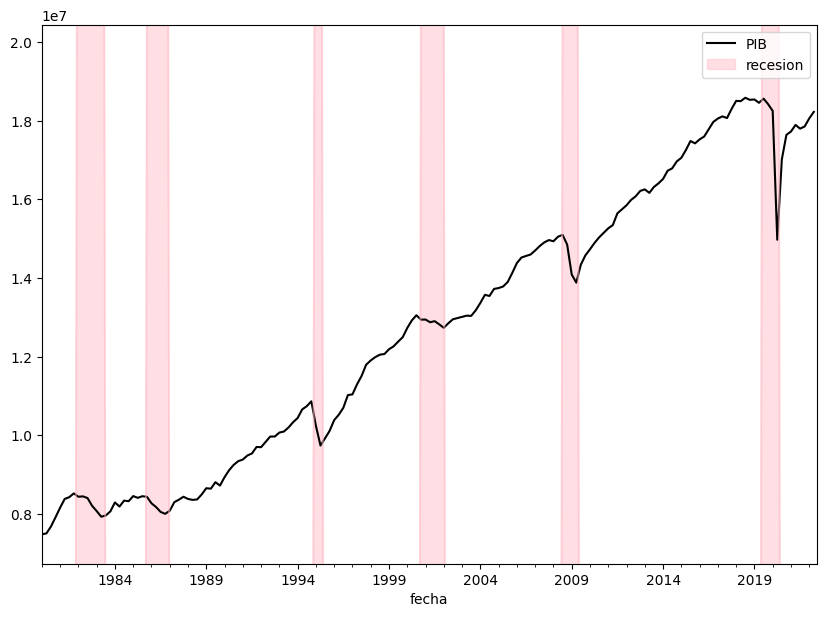

In [6]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
datos_rec2.plot.area(ax=ax, figsize=(10, 7), x='fecha', alpha=0.5, color="pink")
plt.ylim(pib_trim['PIB'].min()*0.9, pib_trim['PIB'].max()*1.1)
plt.show()

**Graficamos la última recesión de México**

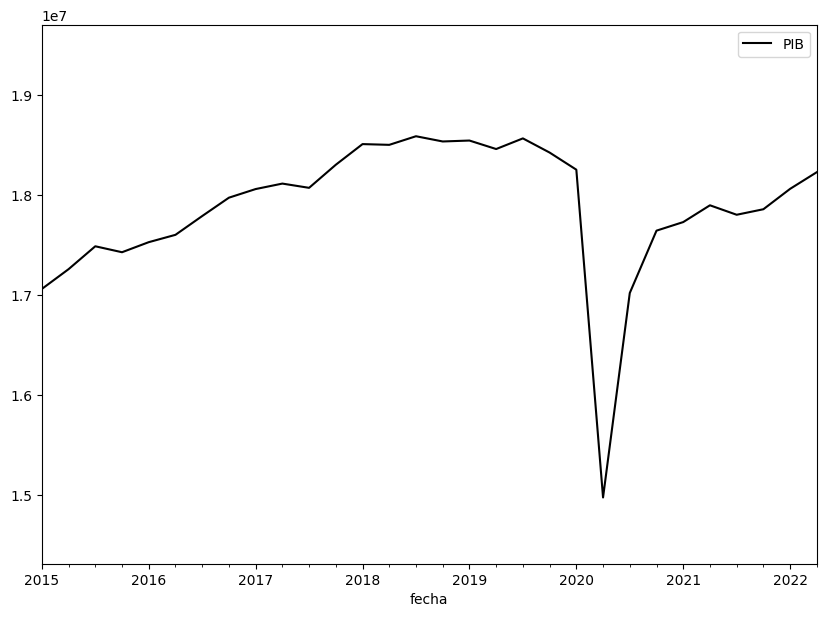

In [7]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2015-01-01', '2022-06-01')
plt.show()

como podras notar aun no se recupera el nivel del PIB que México tenia previo a la pandemia, la pregunta es **¿cuándo recuperara México el PIB previo de la recesión de la Pandemia?**

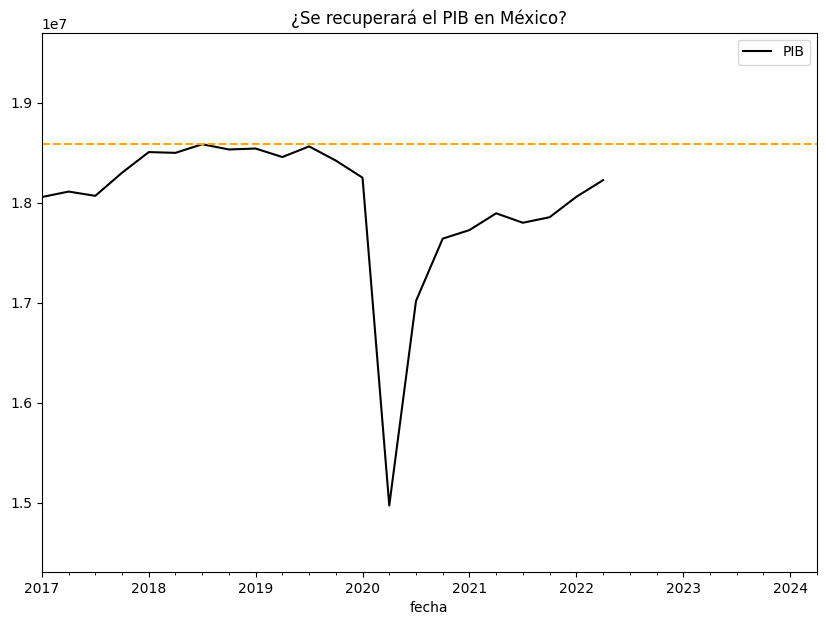

In [8]:
fig1, ax = plt.subplots()
pib_trim.plot.line(ax=ax, figsize=(10, 7), y='PIB', x='fecha', color="black")
ax.axhline(y=pib_trim['PIB'].max(), color="orange", linestyle='--')
plt.title('¿Se recuperará el PIB en México?')
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim('2017-01-01', '2024-06-01')
plt.show()

Así que tu trabajo sera hacer un pronóstico de cuantos trimestres mas le tomará a la economía recuperar su nivel prepandemia y si esa recuperación ocurrirá al final del sexenio

Realiza lo siguiente:
1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria
2. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff
3. Realiza la prueba de raíz unitaria y verifica que la primera diferencia del PIB sea estacionario
4. Una vez que el PIB sea estacionario  realiza las gráficas de ACF y PACF para tratar de identificar el proceso, y plantea por lo menos tres procesos (solo plantearlos, no estimarlos)
5. Con base en la notebook "pronostico_arima" utiliza la función "*if*" para probar hasta un arma(6,6) de la series pib_diff
6. Si naciste en enero-junio utiliza el criterio bayesiano de información (BIC) para seleccionar el modelo, si naciste julio-diciembre utiliza el criterio de Akaike (AIC).


1. Prueba de raíz unitaria para verificar que el PIB sea una serie estacionaria

In [9]:
pib_trim.head()

,fecha,PIB
0,1980Q1,7.477954e+06
1,1980Q2,7.501150e+06
2,1980Q3,7.677707e+06
3,1980Q4,7.913464e+06
4,1981Q1,8.155986e+06


2. Verificamos estacionalidad

In [10]:
#Prueba de Raiz Unitaria
  #Prueba de Dickey- fuller
  #Ho: Serie no estacionaria, Ha: Serie estacionaria
ADF_test1 = adfuller(pib_trim['PIB'])

#Nivel de significancia 
alpha = 0.05

if ADF_test1[1] < alpha:
  print('Rechazamos H0, Serie estacionaria')
else:
  print('No rechazamos H0, La serie es No estacionaria')

No rechazamos H0, La serie es No estacionaria


Como sabemos que la serie es NO estacionaria, aplicamos primeras diferencias

$$\Delta Y_t = Y_t = T_{t-1}$$

3. En caso de que no lo sea diferencia el PIB y guardalo en un objeto llamado pib_diff

In [11]:
#Aplicamos las primeras diferencias
pib_trim['PIB_diff'] = pib_trim['PIB'].diff()

In [12]:
pib_trim.head()

,fecha,PIB,PIB_diff
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502


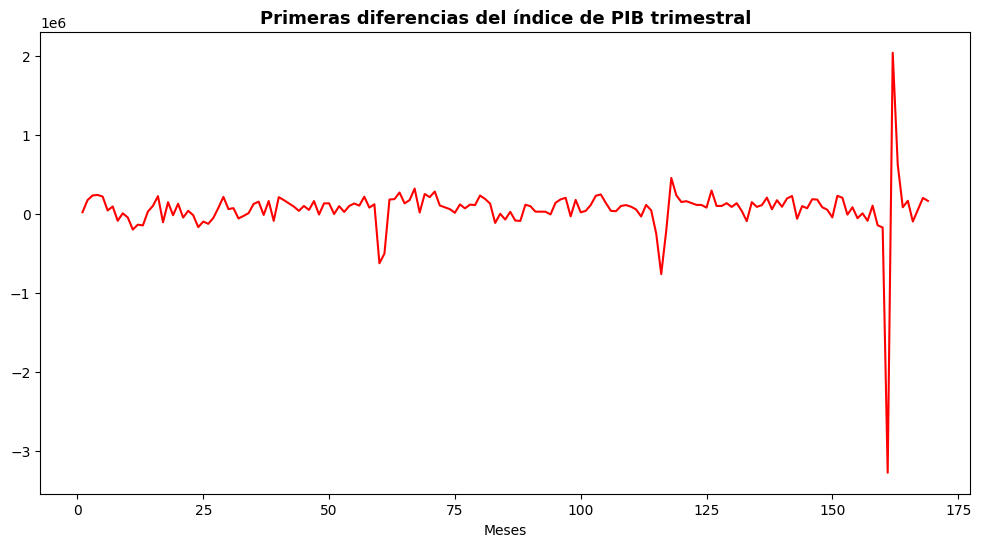

In [13]:
#Graficamos las diferencias
pib_trim['PIB_diff'].plot(figsize=(12,6),color='red')
plt.xlabel('Meses')
plt.title('Primeras diferencias del índice de PIB trimestral', 
          fontweight='bold', fontsize=13)
plt.show();

In [14]:
#Prueba de Raiz Unitaria
  #Prueba de Dickey- fuller
  #H0: Serie no estacionaria, Ha: Serie estacionaria
ADF_test2 = adfuller(pib_trim['PIB_diff'].dropna())

#Nivel de significancia 
alpha = 0.05

if ADF_test2[1] < alpha:
  print('Rechazamos H0, Serie estacionaria')
else:
  print('No rechazamos H0, La serie es No estacionaria')

Rechazamos H0, Serie estacionaria


In [15]:
#Estadistico
ADF_test2[1]

9.408618418534971e-20

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


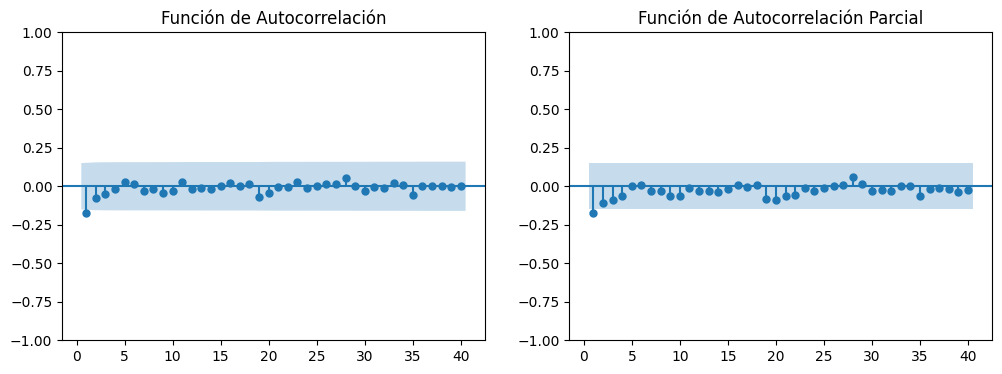

In [16]:
ig, ax = plt.subplots(1,2,figsize=(12,4))
 
plot_acf(pib_trim['PIB_diff'].dropna(), zero=False, lags=40,
         ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(pib_trim['PIB_diff'].dropna(), zero=False, lags=40,
          ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show();

Se puede observar que la inflacción tiene un efecto estacionario.

Procesos planteados:

-ARIMA(1,1,1) 
-ARIMA(1,1,2)
-ARIMA(2,1,1)

In [17]:
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults

In [18]:
ic = {}
for ar in range(6):
  for ma in range(6):
    print(f"AR: {ar}, MA: {ma}")
    modelo = ARIMA(pib_trim['PIB_diff'].dropna(), order=(ar, 0, ma))
    resultado = modelo.fit()
    ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

AR: 0, MA: 3
AR: 0, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

AR: 0, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 0
AR: 1, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

AR: 1, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 3, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

AR: 3, MA: 3
AR: 3, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

AR: 3, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

AR: 4, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as star

AR: 4, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 5, MA: 0
AR: 5, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 5, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 5, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

AR: 5, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as star

AR: 5, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Si naciste julio-diciembre utiliza el criterio de Akaike (AIC)

13 de Septiembre

In [19]:
ic.sort_values('AIC', ascending = True).head(5)

AIC          BIC
AR MA                          
1  1   4779.234829  4791.754423
   2   4779.661444  4795.310937
2  1   4779.844080  4795.493574
0  1   4779.904157  4789.293853
   2   4780.174473  4792.694068

El menor valor obtenido bajo el criterio AIC, es un modelo ARIMA(1,0,1)

In [20]:
modelo = ARIMA(pib_trim['PIB'].dropna(), order = (1,1,1))
resultado = modelo.fit()
print(resultado.summary());

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2392.902
Date:                Fri, 12 May 2023   AIC                           4791.803
Time:                        05:23:40   BIC                           4801.193
Sample:                             0   HQIC                          4795.614
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1149      1.307     -0.088      0.930      -2.676       2.446
ma.L1          0.0820      1.308      0.063      0.950      -2.482       2.646
sigma2      1.159e+11   1.35e-10   8.58e+20      0.0

In [21]:
#ejecuta el siguiente modelo definiendo el orden ARIMA (p,I,q) que sugieren los pasos anteriores
# yo aleatoriamente elegi un arima(1,1,1)
p=1
I=1
q=1 

model = ARIMA(pib_trim['PIB'],order=(p,I,q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2392.902
Date:                Fri, 12 May 2023   AIC                           4791.803
Time:                        05:23:40   BIC                           4801.193
Sample:                             0   HQIC                          4795.614
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1149      1.307     -0.088      0.930      -2.676       2.446
ma.L1          0.0820      1.308      0.063      0.950      -2.482       2.646
sigma2      1.159e+11   1.35e-10   8.58e+20      0.0

In [22]:
## nota que la serie de tiempo el primer trimestre de 1980 es 0, 
## y el segundo trimestre de 2022 es 169
pib_trim

,fecha,PIB,PIB_diff
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502
...,...,...,...
165,2021Q2,1.789327e+07,167830.277268
166,2021Q3,1.779862e+07,-94646.967531
167,2021Q4,1.785390e+07,55276.784448
168,2022Q1,1.805777e+07,203875.598971


por tanto nosotros queremos graficar el tercer trimestre de 2022 (170), el cuarto trimestre de 2022 (171), etc.

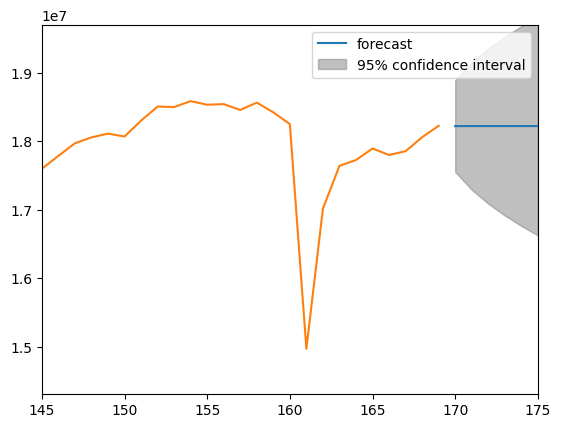

In [23]:
# graficamente esto es lo que buscamos
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results, start=170,end=175)
plt.plot(pib_trim['PIB'])
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim(145,175)
plt.show()


In [24]:
## el valor máximo lo podemos buscar de forma sencilla con 
pib_trim['PIB'].max()

18583728.7115077

pronosticamos dos años

In [25]:
results.predict(170, 178)

170    1.821973e+07
171    1.822030e+07
172    1.822023e+07
173    1.822024e+07
174    1.822024e+07
175    1.822024e+07
176    1.822024e+07
177    1.822024e+07
178    1.822024e+07
Name: predicted_mean, dtype: float64

creamos un duplicado

In [26]:
pib_trim_dup = pib_trim.copy()
#Visualizamos el duplicado
pib_trim_dup.head()

,fecha,PIB,PIB_diff
0,1980Q1,7.477954e+06,NaN
1,1980Q2,7.501150e+06,23196.019979
2,1980Q3,7.677707e+06,176556.367223
3,1980Q4,7.913464e+06,235757.117109
4,1981Q1,8.155986e+06,242521.879502


verificamos en que trimestre se alcanza otra vez el valor máximo, y anoten en la conclusion que trimestre se alcanza (recuerden que es un intervalo de 95% de confianza)

In [27]:
#Prueba de Raiz Unitaria
  #Prueba de Dickey- fuller
#Ho: Serie no estacionaria, Ha: Serie estacionaria
ADF_test3 = adfuller(pib_trim_dup['PIB_diff'].dropna())

#Nivel de significancia 
alpha = 0.05
if ADF_test2[1] < alpha:
  print('Rechazamos H0, Serie estacionaria')
else:
  print('No rechazamos H0, La serie es No estacionaria')

Rechazamos H0, Serie estacionaria


In [28]:
ADF_test3[1]

9.408618418534971e-20

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


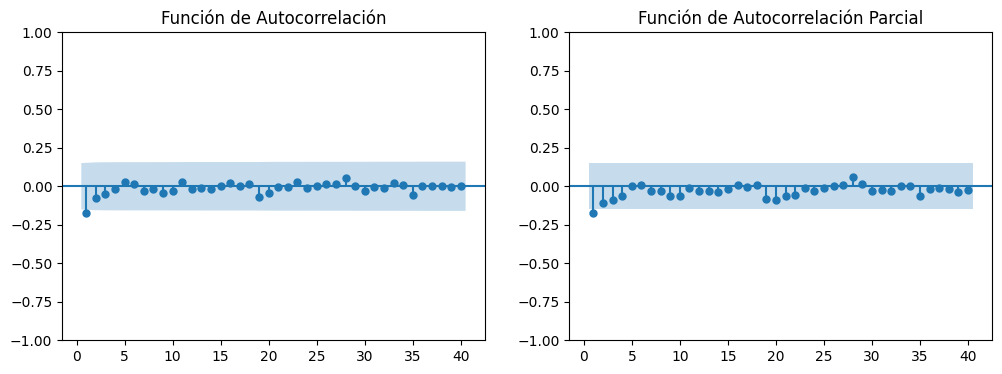

In [29]:
ig, ax = plt.subplots(1,2,figsize=(12,4))
 
plot_acf(pib_trim_dup['PIB_diff'].dropna(), zero=False, lags=40,
         ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(pib_trim_dup['PIB_diff'].dropna(), zero=False, lags=40,
          ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show();

In [30]:
#Vamos a estimar varios modelos y que se guarde el AIC BIC
ar = 0
ma = 0
ic_pib2 = {}
for ar in range(6):
  for ma in range(6):
    print(f"AR: {ar}, MA: {ma}")
    modelo_pib2 = ARIMA(pib_trim_dup['PIB'].dropna(), order=(ar, 1, ma))
    resultado_pib2 = modelo_pib2.fit()
    ic_pib2[(ar, ma)] = [resultado_pib2.aic, resultado_pib2.bic]
 
ic_pib2 = pd.DataFrame(ic_pib2, index=["AIC", "BIC"]).T
ic_pib2.index = ic_pib2.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 2
AR: 2, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 2
AR: 3, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
ic_pib2.sort_values('AIC', ascending = True).head(5)

,,AIC,BIC
AR,MA,,
2,1,4788.003562,4800.523157
1,2,4788.113887,4800.633482
0,0,4788.521670,4791.651569
1,0,4789.817349,4796.077146
0,1,4789.821056,4796.080853


In [32]:
modeloA = ARIMA(pib_trim_dup['PIB'].dropna(), order = (2,1,1)) #Utilizando la diferenciación
resultadoA = modeloA.fit()
print(resultadoA.summary());

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  170
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2390.002
Date:                Fri, 12 May 2023   AIC                           4788.004
Time:                        05:24:00   BIC                           4800.523
Sample:                             0   HQIC                          4793.084
                                - 170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9517      0.026     37.075      0.000       0.901       1.002
ar.L2          0.0483      0.023      2.071      0.038       0.003       0.094
ma.L1         -0.9992      0.037    -26.837      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


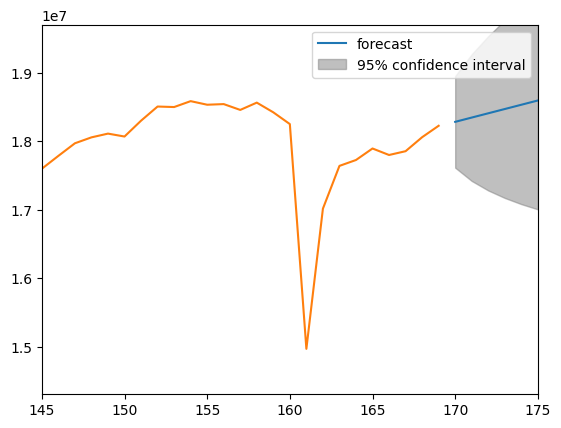

In [33]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(resultadoA, start=170,end=175)
plt.plot(pib_trim['PIB'])
plt.ylim( pib_trim['PIB'].max()*0.77, pib_trim['PIB'].max()*1.06)
plt.xlim(145,175)
plt.show()

In [34]:
pib_trim_dup['PIB'].max()

18583728.7115077

In [35]:
resultadoA.predict(170, 178)

170    1.828190e+07
171    1.834439e+07
172    1.840663e+07
173    1.846887e+07
174    1.853112e+07
175    1.859336e+07
176    1.865560e+07
177    1.871784e+07
178    1.878007e+07
Name: predicted_mean, dtype: float64

Por lo tanto, tenemos el mismo valor en los dos pronósticos realizados.

Añade nombre, matricula y grupo


## Cinthya Yesenia López Díaz 1658003
## Grupo 042